## Importing libraries

In [116]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings

# Ignore specific warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


%matplotlib inline 

# Summary of `dictionary.csv`

## Overview

The `dictionary.csv` file provides demographic and economic information about various countries. This file includes data on country names, codes, population, and GDP per capita, which can be useful for analyzing global data in the context of the Olympic Games or other datasets.

## Columns

- **`Country`**: The name of the country.
- **`Code`**: The three-letter country code.
- **`Population`**: The population of the country.
- **`GDP per Capita`**: The GDP per capita of the country.

## Usage

- **Demographic Analysis:** Helps users understand population sizes of different countries.
- **Economic Analysis:** Provides insights into the economic status of countries through GDP per capita.
- **Data Integration:** Can be used to enrich other datasets by adding demographic and economic context.

## Example Entries

| `Country`         | `Code` | `Population` | `GDP per Capita` |
|-------------------|--------|--------------|------------------|
| `Afghanistan`     | `AFG`  | 32,526,562   | 594.32           |
| `Albania`         | `ALB`  | 2,889,167    | 3,945.22         |
| `Algeria`         | `ALG`  | 39,666,519   | 4,206.03         |
| `American Samoa*` | `ASA`  | 55,538       | NaN              |
| `Andorra`         | `AND`  | 70,473       | NaN              |

This file is useful for understanding the demographic and economic context of countries, which can be valuable for various analyses and data interpretations.

For more details and to explore the dataset, visit the [Kaggle page](https://www.kaggle.com/datasets/the-guardian/olympic-games).


In [118]:
ref = pd.read_csv("/kaggle/input/olympus/Clearner_data/dictionary.csv")

ref.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


## We have to do some Name Fix for some countries in order to do a merge with what was provided in the sample submission

In [119]:
# Mapping from list 1 to list 2
country_mapping = {
    'American Samoa*': 'American Samoa',
    'Aruba*': 'Aruba',
    'Belarus': 'Belarus',
    'Bermuda*': 'Bermuda',
    'British Virgin Islands': 'Virgin Islands, British',
    'Brunei': 'Brunei Darussalam',
    'Burma': 'Myanmar',
    'Cape Verde': 'Cabo Verde',
    'Cayman Islands*': 'Cayman Islands',
    'China': 'People’s Republic of China',
    'Congo, Dem Rep': 'Democratic Republic of the Congo',
    "Cote d'Ivoire": 'Côte d’Ivoire',
    'Czech Republic': 'Czechia',
    'East Timor (Timor-Leste)': 'Democratic Rep. of Timor-Leste',
    'Hong Kong*': 'Hong Kong, China',
    'Iran': 'Islamic Republic of Iran',
    'Korea, North': 'Democratic People’s Republic of Korea',
    'Korea, South': 'Republic of Korea',
    'Laos': 'Lao People’s Democratic Republic',
    'Macedonia': 'North Macedonia',
    'Micronesia': 'Federated States of Micronesia',
    'Moldova': 'Republic of Moldova',
    'Netherlands Antilles*': 'None',  # Or map to a specific name if applicable
    'Palestine, Occupied Territories': 'Palestine',
    'Puerto Rico*': 'Puerto Rico',
    'Russia': 'Russian Federation',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'Swaziland': 'Eswatini',
    'Syria': 'Syrian Arab Republic',
    'Taiwan': 'Chinese Taipei',
    'Tanzania': 'United Republic of Tanzania',
    'Turkey': 'Türkiye',
    'United Kingdom': 'Great Britain',
    'United States': 'United States of America',
    'Virgin Islands*': 'Virgin Islands, US'
}

# Apply the mapping using replace
ref['Country'] = ref['Country'].replace(country_mapping)

In [120]:
ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


## Sample Submission File provided by Zindi

In [121]:
ss = pd.read_csv("/kaggle/input/olympus/Clearner_data/SampleSubmission.csv")

ss.head()

,Country,Target
0,Algeria_gold,0
1,Angola_gold,0
2,Benin_gold,0
3,Botswana_gold,0
4,Burkina Faso_gold,0


In [122]:
# Extract text before the underscore and create a new column 'Country_Extracted'
ss['Country_Extracted'] = ss['Country'].str.split('_').str[0]

In [123]:
ss.head()

,Country,Target,Country_Extracted
0,Algeria_gold,0,Algeria
1,Angola_gold,0,Angola
2,Benin_gold,0,Benin
3,Botswana_gold,0,Botswana
4,Burkina Faso_gold,0,Burkina Faso


In [124]:
# Extract unique countries from Country_Extracted
unique_countries = ss['Country_Extracted'].unique()

In [125]:
# Create a new DataFrame with unique countries and Target set to 0
new_df = pd.DataFrame({
    'Country': [f"{country}" for country in unique_countries],
    'Target': [0] * len(unique_countries)
})

In [126]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  204 non-null    object
 1   Target   204 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [127]:
# Perform a left merge to keep all values from new_df
merged_df = pd.merge(new_df, ref, how='left', on='Country')

# Display the resulting DataFrame and its info
print("Merged DataFrame:")
print(merged_df.head())
print("\nMerged DataFrame Info:")
print(merged_df.info())

Merged DataFrame:
        Country  Target Code  Population  GDP per Capita
0       Algeria       0  ALG  39666519.0     4206.031232
1        Angola       0  ANG  25021974.0     4101.472152
2         Benin       0  BEN  10879829.0      762.051205
3      Botswana       0  BOT   2262485.0     6360.138220
4  Burkina Faso       0  BUR  18105570.0      589.774414

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         204 non-null    object 
 1   Target          204 non-null    int64  
 2   Code            198 non-null    object 
 3   Population      194 non-null    float64
 4   GDP per Capita  174 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.1+ KB
None


## We have some missing country data in `Code`, `Population`, `GDP per Capita`

In [128]:
merged_df.head()

,Country,Target,Code,Population,GDP per Capita
0,Algeria,0,ALG,39666519.0,4206.031232
1,Angola,0,ANG,25021974.0,4101.472152
2,Benin,0,BEN,10879829.0,762.051205
3,Botswana,0,BOT,2262485.0,6360.138220
4,Burkina Faso,0,BUR,18105570.0,589.774414


In [129]:
merged_df.isnull().sum()

Country            0
Target             0
Code               6
Population        10
GDP per Capita    30
dtype: int64

In [130]:
# Filter rows with missing 'Code' values
missing_code_rows = merged_df[merged_df['Code'].isna()]

# Display rows with missing 'Code' values
print("Rows with missing 'Code' values:")
print(missing_code_rows)

Rows with missing 'Code' values:
              Country  Target Code  Population  GDP per Capita
47        South Sudan       0  NaN         NaN             NaN
164            Kosovo       0  NaN         NaN             NaN
173        Montenegro       0  NaN         NaN             NaN
192          Kiribati       0  NaN         NaN             NaN
193  Marshall Islands       0  NaN         NaN             NaN
202            Tuvalu       0  NaN         NaN             NaN


## Fixing the issue with missing `Code`

In [131]:
# List of rows with missing 'Code' values
missing_countries = ['South Sudan', 'Kosovo', 'Montenegro', 'Kiribati', 'Marshall Islands', 'Tuvalu']

#unique codes
unique_codes = ["SSD", "KOS","MNE","KIR","MHL","TUV"]

# Create a mapping from missing countries to unique codes
code_mapping = dict(zip(missing_countries, unique_codes))

# Update the 'Code' column in merged_df for the missing rows
merged_df.loc[merged_df['Country'].isin(missing_countries), 'Code'] = merged_df['Country'].map(code_mapping)

# Verify the update
print("Updated DataFrame:")
print(merged_df[merged_df['Country'].isin(missing_countries)])

Updated DataFrame:
              Country  Target Code  Population  GDP per Capita
47        South Sudan       0  SSD         NaN             NaN
164            Kosovo       0  KOS         NaN             NaN
173        Montenegro       0  MNE         NaN             NaN
192          Kiribati       0  KIR         NaN             NaN
193  Marshall Islands       0  MHL         NaN             NaN
202            Tuvalu       0  TUV         NaN             NaN


In [132]:
# Check if there are any missing 'Code' values remaining
print("Missing values in 'Code' after assignment:")
print(merged_df['Code'].isna().sum())

Missing values in 'Code' after assignment:
0


## Did an online search and found the recent population data for the given countrys 

In [133]:
population_data = {
    'South Sudan': 11277092,
    'Kosovo': 1771065,
    'Montenegro': 626102,
    'Kiribati': 135763,
    'Marshall Islands': 41996,
    'Tuvalu': 11478
}

In [134]:
# Update only the 'Population' column using the dictionary
merged_df.loc[merged_df['Country'].isin(population_data.keys()), 'Population'] = \
    merged_df.loc[merged_df['Country'].isin(population_data.keys()), 'Country'].map(population_data)

In [135]:
print(merged_df[merged_df['Country'].isin(missing_countries)])

              Country  Target Code  Population  GDP per Capita
47        South Sudan       0  SSD  11277092.0             NaN
164            Kosovo       0  KOS   1771065.0             NaN
173        Montenegro       0  MNE    626102.0             NaN
192          Kiribati       0  KIR    135763.0             NaN
193  Marshall Islands       0  MHL     41996.0             NaN
202            Tuvalu       0  TUV     11478.0             NaN


## Did an online search and found the recent GDP Per Capita data for the given countrys 

In [136]:
gdp_per_capita_data = {
    'South Sudan': 1000,
    'Kosovo': 4500,
    'Montenegro': 7500,
    'Kiribati': 2500,
    'Marshall Islands': 5000,
    'Tuvalu': 3000
}

In [137]:
# Update 'GDP per Capita' column
merged_df.loc[merged_df['Country'].isin(gdp_per_capita_data.keys()), 'GDP per Capita'] = \
    merged_df.loc[merged_df['Country'].isin(gdp_per_capita_data.keys()), 'Country'].map(gdp_per_capita_data)

In [138]:
print(merged_df[merged_df['Country'].isin(missing_countries)])

              Country  Target Code  Population  GDP per Capita
47        South Sudan       0  SSD  11277092.0          1000.0
164            Kosovo       0  KOS   1771065.0          4500.0
173        Montenegro       0  MNE    626102.0          7500.0
192          Kiribati       0  KIR    135763.0          2500.0
193  Marshall Islands       0  MHL     41996.0          5000.0
202            Tuvalu       0  TUV     11478.0          3000.0


# 120 Years of Olympic History: Athletes and Results

## Overview

This dataset aims to provide up-to-date Olympic event information from 1896 to 2022. It is designed for sports enthusiasts and analysts to visualize and derive insights from comprehensive Olympic data.

## Unique Features

- **Ranking Data:** Contains rankings for each sporting event linked to specific countries and athletes, useful for performance-related analytics.
- **Athlete Bio:** Includes detailed string information about athletes, which can provide deeper insights into their profiles.

## Basic Dataset Information

- **Athletes:** 154,902 unique athletes with biological information such as height, weight, and date of birth.
- **Olympic Games:** Covers all Winter and Summer Olympic Games from 1896 to 2022.
- **Results:** 7,326 unique results for specific events at Olympic Games.
- **Rows of Data:** 314,726 rows linking athletes to results, including both team and individual sports.
- **Countries:** 235 distinct countries, including historical entries.

## Files Included

### `Olympic_Athlete_Bio.csv`
- **Description:** Contains detailed biographical information about Olympic athletes.
- **Columns:**
  - `athlete_id`: Unique identifier for the athlete.
  - `name`: Name of the athlete.
  - `sex`: Gender of the athlete.
  - `born`: Birth year of the athlete.
  - `height`: Height of the athlete in centimeters.
  - `weight`: Weight of the athlete in kilograms.
  - `country`: Country represented by the athlete.
  - `country_noc`: National Olympic Committee code.
  - `description`: Additional descriptions or notes about the athlete.
  - `special_notes`: Any special notes regarding the athlete.

### `Olympic_Athlete_Event_Results.csv`
- **Description:** Contains data on athlete results for Olympic events, including rankings.
- **Columns:**
  - `edition`: Edition of the Olympic Games.
  - `edition_id`: Unique identifier for the edition.
  - `country_noc`: National Olympic Committee code.
  - `sport`: Sport in which the result was achieved.
  - `event`: Specific event within the sport.
  - `result_id`: Unique identifier for the result.
  - `athlete`: Name of the athlete.
  - `athlete_id`: Reference to the `Olympic_Athlete_Bio.csv` file.
  - `pos`: Position achieved (may include strings with additional round or heat information).
  - `medal`: Type of medal won (Gold, Silver, Bronze) or None if no medal was won.
  - `isTeamSport`: Indicator if the event is a team sport.

### `Olympic_Games_Medal_Tally.csv`
- **Description:** Summarizes the total medal tally by country for each Olympic Games.
- **Columns:**
  - `edition`: Edition of the Olympic Games.
  - `edition_id`: Unique identifier for the edition.
  - `year`: Year of the Olympic Games.
  - `country`: Country name.
  - `country_noc`: National Olympic Committee code.
  - `gold`: Number of gold medals won.
  - `silver`: Number of silver medals won.
  - `bronze`: Number of bronze medals won.
  - `total`: Total number of medals won.

### `Olympic_Results.csv`
- **Description:** Provides detailed results for Olympic events.
- **Columns:**
  - `result_id`: Unique identifier for the result.
  - `event_title`: Title of the event.
  - `edition`: Edition of the Olympic Games.
  - `edition_id`: Unique identifier for the edition.
  - `sport`: Sport contested in the Olympic Games.
  - `sport_url`: URL for more information about the sport.
  - `result_date`: Date of the result.
  - `result_location`: Location where the result was achieved.
  - `result_participants`: Number of participants in the result.
  - `result_format`: Format of the result.
  - `result_detail`: Detailed result information.
  - `result_description`: Description of the result.

### `Olympics_Country.csv`
- **Description:** Contains information about participating countries.
- **Columns:**
  - `noc`: National Olympic Committee code.
  - `country`: Country name.

### `Olympics_Games.csv`
- **Description:** Provides information about the Olympic Games.
- **Columns:**
  - `edition`: Edition of the Olympic Games.
  - `edition_id`: Unique identifier for the edition.
  - `edition_url`: URL for more information about the edition.
  - `year`: Year of the Olympic Games.
  - `city`: Host city of the Olympics.
  - `country_flag_url`: URL for the country flag.
  - `country_noc`: National Olympic Committee code.
  - `start_date`: Start date of the Olympics.
  - `end_date`: End date of the Olympics.
  - `competition_date`: Date of the competition.
  - `isHeld`: Indicator if the Olympics were held.

## How to Use the Dataset

1. **Combine Data Files:**
   - **`Olympic_Athlete_Event_Results.csv`** can be joined with **`Olympic_Athlete_Bio.csv`** on `athlete_id` to get complete athlete details.
   - **`Olympic_Athlete_Event_Results.csv`** can be joined with **`Olympic_Results.csv`** on `result_id` to get detailed event information.

2. **Calculate Features:**
   - **BMI:** Derived from height and weight.
   - **Age of Participation:** Calculated from the start date of the result minus the athlete's date of birth.

3. **Visualization and Analysis:**
   - Use the data for performance analysis, trend exploration, and creating visualizations.

## Data Source

The data is sourced from [Olypedia.org](https://www.olympedia.org), which provides up-to-date Olympic data from the 1896 Athens Summer Olympics to the 2022 Beijing Winter Olympics. The dataset was collected through web scraping using Python's BeautifulSoup.

For further details and to explore the dataset, visit the [Kaggle page](https://www.kaggle.com/datasets/josephcheng123456/olympic-historical-dataset-from-olympediaorg).

In [139]:
# Load CSV files
athlete_bio = pd.read_csv('/kaggle/input/olympus/Clearner_data/Olympic_Athlete_Bio.csv')
athlete_event_results = pd.read_csv('/kaggle/input/olympus/Clearner_data/Olympic_Athlete_Event_Results.csv')
games_medal_tally = pd.read_csv('/kaggle/input/olympus/Clearner_data/Olympic_Games_Medal_Tally.csv')
results = pd.read_csv('/kaggle/input/olympus/Clearner_data/Olympic_Results.csv')
country = pd.read_csv('/kaggle/input/olympus/Clearner_data/Olympics_Country.csv')
games = pd.read_csv('/kaggle/input/olympus/Clearner_data/Olympics_Games.csv')

## Doing a merge for the above given data which was provided collectively

In [140]:
# Step 1: Merge athlete_event_results with athlete_bio
athlete_event_bio = pd.merge(athlete_event_results, athlete_bio, on='athlete_id', how='left')

# Step 2: Merge with results to get result details
athlete_event_bio_results = pd.merge(athlete_event_bio, results, on='result_id', how='left')

# Step 3: Merge with games_medal_tally to get medal tally information
# Rename columns in games_medal_tally to avoid conflicts
games_medal_tally_renamed = games_medal_tally.rename(columns={'edition': 'games_medal_edition', 'country_noc': 'games_medal_country_noc'})

# Check column names
print("Columns in athlete_event_bio_results:", athlete_event_bio_results.columns)
print("Columns in games_medal_tally_renamed:", games_medal_tally_renamed.columns)

# Perform the merge
athlete_event_bio_results_medal_tally = pd.merge(
    athlete_event_bio_results,
    games_medal_tally_renamed,
    left_on=['edition_x', 'country_noc_x'],
    right_on=['games_medal_edition', 'games_medal_country_noc'],
    how='left'
)

# Step 4: Merge with games to get details about the games
# Rename columns in games to avoid conflicts
games_renamed = games.rename(columns={'edition_id': 'games_edition_id'})

# Check column names
print("Columns in athlete_event_bio_results_medal_tally:", athlete_event_bio_results_medal_tally.columns)
print("Columns in games_renamed:", games_renamed.columns)

# Perform the merge
final_df = pd.merge(
    athlete_event_bio_results_medal_tally,
    games_renamed,
    left_on='edition_id_x',
    right_on='games_edition_id',
    how='left'
)

# Step 5: Merge with country to get country names
# Check column names
print("Columns in final_df:", final_df.columns)
print("Columns in country:", country.columns)

# Perform the merge
final_df = pd.merge(
    final_df,
    country,
    left_on='country_noc_x',
    right_on='noc',
    how='left'
)

# Display the final merged DataFrame
print(final_df.head())

Columns in athlete_event_bio_results: Index(['edition_x', 'edition_id_x', 'country_noc_x', 'sport_x', 'event',
       'result_id', 'athlete', 'athlete_id', 'pos', 'medal', 'isTeamSport',
       'name', 'sex', 'born', 'height', 'weight', 'country', 'country_noc_y',
       'description', 'special_notes', 'event_title', 'edition_y',
       'edition_id_y', 'sport_y', 'sport_url', 'result_date',
       'result_location', 'result_participants', 'result_format',
       'result_detail', 'result_description'],
      dtype='object')
Columns in games_medal_tally_renamed: Index(['games_medal_edition', 'edition_id', 'year', 'country',
       'games_medal_country_noc', 'gold', 'silver', 'bronze', 'total'],
      dtype='object')
Columns in athlete_event_bio_results_medal_tally: Index(['edition_x', 'edition_id_x', 'country_noc_x', 'sport_x', 'event',
       'result_id', 'athlete', 'athlete_id', 'pos', 'medal', 'isTeamSport',
       'name', 'sex', 'born', 'height', 'weight', 'country_x', 'country_noc_y

In [141]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318019 entries, 0 to 318018
Data columns (total 53 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   edition_x                318019 non-null  object 
 1   edition_id_x             318019 non-null  int64  
 2   country_noc_x            318019 non-null  object 
 3   sport_x                  318019 non-null  object 
 4   event                    318019 non-null  object 
 5   result_id                318019 non-null  int64  
 6   athlete                  318019 non-null  object 
 7   athlete_id               318019 non-null  int64  
 8   pos                      318019 non-null  object 
 9   medal                    44996 non-null   object 
 10  isTeamSport              318019 non-null  bool   
 11  name                     318012 non-null  object 
 12  sex                      318012 non-null  object 
 13  born                     312268 non-null  object 
 14  heig

In [142]:
# Drop unnecessary columns
final_df = final_df.drop(columns=[
    'country_noc_y',     # Duplicate or redundant column
    'country_y',         # Redundant with 'athlete_country' and 'medal_tally_country'
    'isHeld',            # No non-null values
    'edition_y',         # Duplicate or redundant column
    'edition_id_y',      # Duplicate or redundant column
    'country_flag_url',  # Not used in analysis (optional)
    'start_date',        # Optional, might be useful for specific analyses
    'end_date',          # Optional, might be useful for specific analyses
    'result_id',         # Possibly redundant if 'result' columns are sufficient
    'country_y',
    'country_noc',
])

In [143]:
# List of columns to drop
columns_to_drop = [
    'athlete',             # Personal identifiers
    'athlete_id',          # Personal identifiers
    'name',                # Personal identifiers
    'edition_url',         # URLs are typically not useful
    'description',         # Often less useful for models
    'special_notes',       # Often less useful for models
    'result_date',         # Date features can be complex to handle
    'result_location',     # Geographical location might be encoded
    'result_participants', # Descriptive feature
    'result_format',       # Often descriptive
    'result_detail',       # Often descriptive
    'result_description',  # Often descriptive
    'event',               # Might be encoded or included indirectly
    'edition_x',           # Redundant with 'edition' or 'games_edition'
    'edition_id_x',        # Redundant with 'edition_id'
    'country_x',           # Redundant with 'country'
    'edition_y',           # Redundant with 'edition'
    'edition_id_y',        # Redundant with 'edition_id'
    'sport_y',             # Redundant with 'sport_x'
    'sport_url',           # URLs are typically not useful
    'games_medal_edition', # Redundant with 'edition'
    'year_x',              # Redundant with 'year_y'
    'games_medal_country_noc', # Redundant with 'country_noc_x'
    'total',               # Can be computed from gold, silver, bronze
    'noc',                 # Redundant with 'country_noc_x'
    'isTeamSport',         # Might be dropped if not useful
]


final_dfS = final_df.copy()

# Get a list of columns that exist in the DataFrame
existing_columns = final_dfS.columns
# Filter out columns to drop that do not exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]
# Drop unnecessary columns
final_dfS = final_dfS .drop(columns=columns_to_drop)

In [144]:
final_dfS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318019 entries, 0 to 318018
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   country_noc_x     318019 non-null  object 
 1   sport_x           318019 non-null  object 
 2   pos               318019 non-null  object 
 3   medal             44996 non-null   object 
 4   sex               318012 non-null  object 
 5   born              312268 non-null  object 
 6   height            230074 non-null  float64
 7   weight            230074 non-null  object 
 8   event_title       317912 non-null  object 
 9   edition_id        280018 non-null  float64
 10  gold              280018 non-null  float64
 11  silver            280018 non-null  float64
 12  bronze            280018 non-null  float64
 13  edition           318019 non-null  object 
 14  games_edition_id  318019 non-null  int64  
 15  year_y            318019 non-null  int64  
 16  city              31

In [145]:
# Create a mapping from old column names to new unified names
rename_mapping = {
    'country_noc_x': 'country_noc',
    'sport_x': 'sport',
    'event_title': 'event',
    'edition_id': 'edition_id',
    'year_y': 'year',
    'city': 'city',
    'competition_date': 'competition_date',
    'country': 'country'
}

In [146]:
final_dfS.rename(columns=rename_mapping, inplace=True)

In [147]:
final_dfS.medal.value_counts()

medal
Gold      15168
Bronze    15001
Silver    14827
Name: count, dtype: int64

In [148]:
# Define the mapping
medal_mapping = {
    'Gold': 3,
    'Silver': 2,
    'Bronze': 1,
    np.nan: 0
}

# Apply the mapping
final_dfS['medal'] = final_dfS['medal'].map(medal_mapping)

In [149]:
print(final_dfS['pos'].unique())

['DNS' '3 h8 r1/2' '5 h2 r1/2' ... 'AC h1 r4/9' '30 r1/3' '2 r1/2']


In [150]:
final_dfS['pos'].value_counts()

pos
1            16374
2            15897
3            14399
4            13536
5            11908
             ...  
6 p4 r1/2        1
9 h3 r2/4        1
3 h9 r1/6        1
3 p7 r2/4        1
2 r1/2           1
Name: count, Length: 2449, dtype: int64

In [151]:
import re

def clean_pos(value):
    value = str(value).strip()
    
    # Handle cases where value is 'DNS' or 'DNF'
    if value in ['DNS', 'DNF']:
        return -1  # Use -1 to indicate Did Not Start or Did Not Finish

    # Handle cases with '=' sign
    if value.startswith('='):
        value = value[1:].strip()
    
    # Extract the first numeric value
    match = re.match(r'^(\d+)', value)
    if match:
        return int(match.group(1))
    
    # Handle special cases or unexpected formats
    # Additional logic to extract numbers if needed
    match_special = re.findall(r'\d+', value)
    if match_special:
        return int(match_special[0])
    
    return None

# Apply the updated function
final_dfS['pos_cleaned'] = final_dfS['pos'].apply(clean_pos)

# Check for missing values again
missing_values = final_dfS[final_dfS['pos_cleaned'].isnull()]
print(missing_values[['pos', 'pos_cleaned']])

       pos  pos_cleaned
25      AC          NaN
135     AC          NaN
144     AC          NaN
164     AC          NaN
165     AC          NaN
...     ..          ...
316664  DQ          NaN
316678  DQ          NaN
316681  DQ          NaN
317626  DQ          NaN
317899  DQ          NaN

[10383 rows x 2 columns]


In [152]:
final_dfS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318019 entries, 0 to 318018
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   country_noc       318019 non-null  object 
 1   sport             318019 non-null  object 
 2   pos               318019 non-null  object 
 3   medal             318019 non-null  int64  
 4   sex               318012 non-null  object 
 5   born              312268 non-null  object 
 6   height            230074 non-null  float64
 7   weight            230074 non-null  object 
 8   event             317912 non-null  object 
 9   edition_id        280018 non-null  float64
 10  gold              280018 non-null  float64
 11  silver            280018 non-null  float64
 12  bronze            280018 non-null  float64
 13  edition           318019 non-null  object 
 14  games_edition_id  318019 non-null  int64  
 15  year              318019 non-null  int64  
 16  city              31

In [153]:
# Fill missing values with 0
final_dfS['pos_cleaned'] = final_dfS['pos_cleaned'].fillna(0)

In [154]:
final_dfS.born

0             17 June 1889
1          14 January 1886
2         18 February 1882
3         23 December 1883
4            22 April 1878
                ...       
318014     11 January 1993
318015       29 March 2002
318016       23 April 1992
318017      29 August 1985
318018      10 August 1993
Name: born, Length: 318019, dtype: object

In [155]:
from datetime import datetime

# Convert 'born' column to datetime format
final_dfS['born'] = pd.to_datetime(final_dfS['born'], format='%d %B %Y', errors='coerce')

In [156]:
def calculate_age(born_date, year):
    if pd.isnull(born_date):
        return None
    age = year - born_date.year
    return age

In [157]:
# Apply the function to the 'born' column using the 'year' column to calculate age
final_dfS['age'] = final_dfS.apply(lambda row: calculate_age(row['born'], row['year']), axis=1)

final_dfS.head()

,country_noc,sport,pos,medal,sex,born,height,weight,event,edition_id,...,silver,bronze,edition,games_edition_id,year,city,competition_date,country,pos_cleaned,age
0,ANZ,Athletics,DNS,0,Male,1889-06-17,NaN,NaN,"100 metres, Men",5.0,...,2.0,2.0,1908 Summer Olympics,5,1908,London,27 April – 31 October,Australasia,-1.0,19.0
1,ANZ,Athletics,DNS,0,Male,1886-01-14,NaN,NaN,"400 metres, Men",5.0,...,2.0,2.0,1908 Summer Olympics,5,1908,London,27 April – 31 October,Australasia,-1.0,22.0
2,ANZ,Athletics,3 h8 r1/2,0,Male,1882-02-18,NaN,NaN,"800 metres, Men",5.0,...,2.0,2.0,1908 Summer Olympics,5,1908,London,27 April – 31 October,Australasia,3.0,26.0
3,ANZ,Athletics,DNS,0,Male,1883-12-23,NaN,NaN,"800 metres, Men",5.0,...,2.0,2.0,1908 Summer Olympics,5,1908,London,27 April – 31 October,Australasia,-1.0,25.0
4,ANZ,Athletics,DNS,0,Male,1878-04-22,NaN,NaN,"800 metres, Men",5.0,...,2.0,2.0,1908 Summer Olympics,5,1908,London,27 April – 31 October,Australasia,-1.0,30.0


<Axes: >

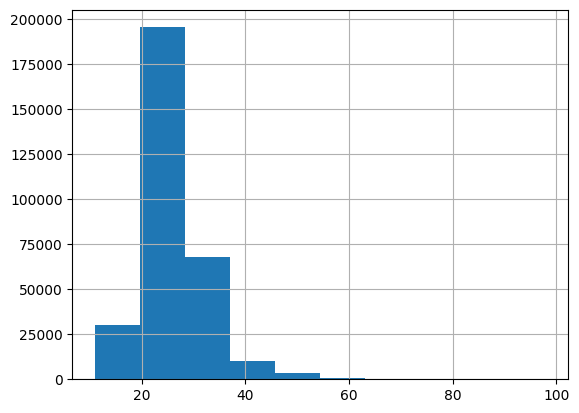

In [158]:
final_dfS['age'].hist()

In [159]:
# Drop the specified columns
columns_to_drop = ['competition_date', 'games_edition_id', 'edition_id', 'pos', 'born']
final_dfS = final_dfS.drop(columns=columns_to_drop)

In [160]:
final_dfS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318019 entries, 0 to 318018
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country_noc  318019 non-null  object 
 1   sport        318019 non-null  object 
 2   medal        318019 non-null  int64  
 3   sex          318012 non-null  object 
 4   height       230074 non-null  float64
 5   weight       230074 non-null  object 
 6   event        317912 non-null  object 
 7   gold         280018 non-null  float64
 8   silver       280018 non-null  float64
 9   bronze       280018 non-null  float64
 10  edition      318019 non-null  object 
 11  year         318019 non-null  int64  
 12  city         318019 non-null  object 
 13  country      318019 non-null  object 
 14  pos_cleaned  318019 non-null  float64
 15  age          308073 non-null  float64
dtypes: float64(6), int64(2), object(8)
memory usage: 38.8+ MB


In [161]:
# Function to handle weight ranges and missing values
def convert_weight(value):
    if pd.isna(value):
        return np.nan
    if '-' in str(value):
        try:
            # Split the range and calculate the average
            parts = str(value).split('-')
            return np.mean([float(part) for part in parts])
        except:
            return np.nan
    try:
        return float(value)
    except:
        return np.nan

# Apply the conversion function
final_dfS['weight'] = final_dfS['weight'].apply(convert_weight)

In [162]:
final_dfS.weight

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
318014     NaN
318015    76.0
318016    78.0
318017    76.5
318018     NaN
Name: weight, Length: 318019, dtype: float64

In [163]:
final_dfS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318019 entries, 0 to 318018
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country_noc  318019 non-null  object 
 1   sport        318019 non-null  object 
 2   medal        318019 non-null  int64  
 3   sex          318012 non-null  object 
 4   height       230074 non-null  float64
 5   weight       230019 non-null  float64
 6   event        317912 non-null  object 
 7   gold         280018 non-null  float64
 8   silver       280018 non-null  float64
 9   bronze       280018 non-null  float64
 10  edition      318019 non-null  object 
 11  year         318019 non-null  int64  
 12  city         318019 non-null  object 
 13  country      318019 non-null  object 
 14  pos_cleaned  318019 non-null  float64
 15  age          308073 non-null  float64
dtypes: float64(7), int64(2), object(7)
memory usage: 38.8+ MB


In [164]:
final_dfS.head()

,country_noc,sport,medal,sex,height,weight,event,gold,silver,bronze,edition,year,city,country,pos_cleaned,age
0,ANZ,Athletics,0,Male,NaN,NaN,"100 metres, Men",1.0,2.0,2.0,1908 Summer Olympics,1908,London,Australasia,-1.0,19.0
1,ANZ,Athletics,0,Male,NaN,NaN,"400 metres, Men",1.0,2.0,2.0,1908 Summer Olympics,1908,London,Australasia,-1.0,22.0
2,ANZ,Athletics,0,Male,NaN,NaN,"800 metres, Men",1.0,2.0,2.0,1908 Summer Olympics,1908,London,Australasia,3.0,26.0
3,ANZ,Athletics,0,Male,NaN,NaN,"800 metres, Men",1.0,2.0,2.0,1908 Summer Olympics,1908,London,Australasia,-1.0,25.0
4,ANZ,Athletics,0,Male,NaN,NaN,"800 metres, Men",1.0,2.0,2.0,1908 Summer Olympics,1908,London,Australasia,-1.0,30.0


In [165]:
# Define a function to classify the edition as Summer or Winter
def is_summer(edition):
    if 'Summer' in edition:
        return 1
    else:
        return 0

# Apply the function to create the IS_summer column
final_dfS['IS_summer'] = final_dfS['edition'].apply(is_summer)

In [166]:
# Drop the 'edition' column
final_dfS = final_dfS.drop(columns=['edition'])

In [167]:
final_dfS['IS_summer'].value_counts()

IS_summer
1    255203
0     62816
Name: count, dtype: int64

In [168]:
final_dfS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318019 entries, 0 to 318018
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country_noc  318019 non-null  object 
 1   sport        318019 non-null  object 
 2   medal        318019 non-null  int64  
 3   sex          318012 non-null  object 
 4   height       230074 non-null  float64
 5   weight       230019 non-null  float64
 6   event        317912 non-null  object 
 7   gold         280018 non-null  float64
 8   silver       280018 non-null  float64
 9   bronze       280018 non-null  float64
 10  year         318019 non-null  int64  
 11  city         318019 non-null  object 
 12  country      318019 non-null  object 
 13  pos_cleaned  318019 non-null  float64
 14  age          308073 non-null  float64
 15  IS_summer    318019 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 38.8+ MB


In [169]:
final_dfS.sex.value_counts()

sex
Male      227972
Female     90040
Name: count, dtype: int64

In [170]:
# Apply One-Hot Encoding
final_dfS = pd.get_dummies(final_dfS, columns=['sex'])

In [171]:
final_dfS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318019 entries, 0 to 318018
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country_noc  318019 non-null  object 
 1   sport        318019 non-null  object 
 2   medal        318019 non-null  int64  
 3   height       230074 non-null  float64
 4   weight       230019 non-null  float64
 5   event        317912 non-null  object 
 6   gold         280018 non-null  float64
 7   silver       280018 non-null  float64
 8   bronze       280018 non-null  float64
 9   year         318019 non-null  int64  
 10  city         318019 non-null  object 
 11  country      318019 non-null  object 
 12  pos_cleaned  318019 non-null  float64
 13  age          308073 non-null  float64
 14  IS_summer    318019 non-null  int64  
 15  sex_Female   318019 non-null  bool   
 16  sex_Male     318019 non-null  bool   
dtypes: bool(2), float64(7), int64(3), object(5)
memory usage: 37.0+ MB


In [172]:
final_dfS[["sex_Female", "sex_Male"]]

,sex_Female,sex_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
318014,True,False
318015,True,False
318016,True,False
318017,True,False


In [173]:
from sklearn.preprocessing import LabelEncoder

# Columns to exclude from encoding
exclude_columns = ['country_noc', 'country']

# Identify non-numeric columns to encode
columns_to_encode = [col for col in final_dfS.select_dtypes(include='object').columns if col not in exclude_columns]

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding
for col in columns_to_encode:
    final_dfS[col] = le.fit_transform(final_dfS[col].astype(str))

final_dfS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318019 entries, 0 to 318018
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country_noc  318019 non-null  object 
 1   sport        318019 non-null  int64  
 2   medal        318019 non-null  int64  
 3   height       230074 non-null  float64
 4   weight       230019 non-null  float64
 5   event        318019 non-null  int64  
 6   gold         280018 non-null  float64
 7   silver       280018 non-null  float64
 8   bronze       280018 non-null  float64
 9   year         318019 non-null  int64  
 10  city         318019 non-null  int64  
 11  country      318019 non-null  object 
 12  pos_cleaned  318019 non-null  float64
 13  age          308073 non-null  float64
 14  IS_summer    318019 non-null  int64  
 15  sex_Female   318019 non-null  bool   
 16  sex_Male     318019 non-null  bool   
dtypes: bool(2), float64(7), int64(6), object(2)
memory usage: 37.0+ MB


In [174]:
# Define a function to fill missing values within groups
def fill_missing_with_group_mean_mode(df, group_cols, fill_cols):
    for col in fill_cols:
        # For columns that should be filled with mean
        if col in ['height', 'weight', 'age']:
            df[col] = df.groupby(group_cols)[col].transform(lambda x: x.fillna(x.mean()))
        # For columns that should be filled with mode
        elif col in ['gold', 'silver', 'bronze']:
            df[col] = df.groupby(group_cols)[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    
    return df

# Columns to fill
fill_columns = ['height', 'weight', 'age', 'gold', 'silver', 'bronze']

# Apply the function
df_filled = fill_missing_with_group_mean_mode(final_dfS, ['country_noc', 'country'], fill_columns)

# If any missing values remain (e.g., if all values in a group were NaN), fill with overall mean or mode
df_filled['height'].fillna(df_filled['height'].mean(), inplace=True)
df_filled['weight'].fillna(df_filled['weight'].mean(), inplace=True)
df_filled['age'].fillna(df_filled['age'].mean(), inplace=True)
df_filled['gold'].fillna(df_filled['gold'].mode()[0], inplace=True)
df_filled['silver'].fillna(df_filled['silver'].mode()[0], inplace=True)
df_filled['bronze'].fillna(df_filled['bronze'].mode()[0], inplace=True)

df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318019 entries, 0 to 318018
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country_noc  318019 non-null  object 
 1   sport        318019 non-null  int64  
 2   medal        318019 non-null  int64  
 3   height       318019 non-null  float64
 4   weight       318019 non-null  float64
 5   event        318019 non-null  int64  
 6   gold         318019 non-null  float64
 7   silver       318019 non-null  float64
 8   bronze       318019 non-null  float64
 9   year         318019 non-null  int64  
 10  city         318019 non-null  int64  
 11  country      318019 non-null  object 
 12  pos_cleaned  318019 non-null  float64
 13  age          318019 non-null  float64
 14  IS_summer    318019 non-null  int64  
 15  sex_Female   318019 non-null  bool   
 16  sex_Male     318019 non-null  bool   
dtypes: bool(2), float64(7), int64(6), object(2)
memory usage: 37.0+ MB


In [175]:
final_clean = df_filled.copy()

In [176]:
merged_df.rename(columns={'Country': 'new_df_Country'}, inplace=True)

# Merge merge4 with new_df on 'country_x' and 'new_df_Country'
final_merge = pd.merge(merged_df, final_clean, left_on='Code', right_on='country_noc', how='left')

# Display columns of final merged dataframe
print("\nColumns in final_merge:")
print(final_merge.columns)

# Optionally, check the first few rows to confirm the merge
print("\nSample rows from final_merge:")
print(final_merge.head())


Columns in final_merge:
Index(['new_df_Country', 'Target', 'Code', 'Population', 'GDP per Capita',
       'country_noc', 'sport', 'medal', 'height', 'weight', 'event', 'gold',
       'silver', 'bronze', 'year', 'city', 'country', 'pos_cleaned', 'age',
       'IS_summer', 'sex_Female', 'sex_Male'],
      dtype='object')

Sample rows from final_merge:
  new_df_Country  Target Code  Population  GDP per Capita country_noc  sport  \
0        Algeria       0  ALG  39666519.0     4206.031232         ALG    7.0   
1        Algeria       0  ALG  39666519.0     4206.031232         ALG    7.0   
2        Algeria       0  ALG  39666519.0     4206.031232         ALG    7.0   
3        Algeria       0  ALG  39666519.0     4206.031232         ALG    7.0   
4        Algeria       0  ALG  39666519.0     4206.031232         ALG    7.0   

   medal  height  weight  ...  silver  bronze    year  city  country  \
0    0.0   175.0    65.0  ...     0.0     1.0  1964.0  40.0  Algeria   
1    0.0   175.0    65

In [177]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280293 entries, 0 to 280292
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   new_df_Country  280293 non-null  object 
 1   Target          280293 non-null  int64  
 2   Code            280293 non-null  object 
 3   Population      278840 non-null  float64
 4   GDP per Capita  269973 non-null  float64
 5   country_noc     280289 non-null  object 
 6   sport           280289 non-null  float64
 7   medal           280289 non-null  float64
 8   height          280289 non-null  float64
 9   weight          280289 non-null  float64
 10  event           280289 non-null  float64
 11  gold            280289 non-null  float64
 12  silver          280289 non-null  float64
 13  bronze          280289 non-null  float64
 14  year            280289 non-null  float64
 15  city            280289 non-null  float64
 16  country         280289 non-null  object 
 17  pos_cleane

In [178]:
# Select rows with missing values
final_merge[final_merge.isnull().any(axis=1)].new_df_Country.value_counts()

new_df_Country
Cuba                                     2701
Chinese Taipei                           1315
Puerto Rico                              1052
Venezuela                                1040
Islamic Republic of Iran                  905
Democratic People’s Republic of Korea     840
Liechtenstein                             399
Virgin Islands, US                        325
Bermuda                                   229
Monaco                                    222
Andorra                                   199
San Marino                                196
Syrian Arab Republic                      169
Papua New Guinea                          118
Guam                                      117
Cayman Islands                             92
Libya                                      92
Eritrea                                    61
Cook Islands                               51
Virgin Islands, British                    49
Aruba                                      46
American Samoa     

In [179]:
# Fill missing values with mean for numerical columns
final_merge['Population'].fillna(final_merge['Population'].mean(), inplace=True)
final_merge['GDP per Capita'].fillna(final_merge['GDP per Capita'].mean(), inplace=True)

In [180]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280293 entries, 0 to 280292
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   new_df_Country  280293 non-null  object 
 1   Target          280293 non-null  int64  
 2   Code            280293 non-null  object 
 3   Population      280293 non-null  float64
 4   GDP per Capita  280293 non-null  float64
 5   country_noc     280289 non-null  object 
 6   sport           280289 non-null  float64
 7   medal           280289 non-null  float64
 8   height          280289 non-null  float64
 9   weight          280289 non-null  float64
 10  event           280289 non-null  float64
 11  gold            280289 non-null  float64
 12  silver          280289 non-null  float64
 13  bronze          280289 non-null  float64
 14  year            280289 non-null  float64
 15  city            280289 non-null  float64
 16  country         280289 non-null  object 
 17  pos_cleane

In [181]:
# Drop the specified columns
final_merge.drop(columns=['Target', 'country_noc', 'country'], inplace=True)

final_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280293 entries, 0 to 280292
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   new_df_Country  280293 non-null  object 
 1   Code            280293 non-null  object 
 2   Population      280293 non-null  float64
 3   GDP per Capita  280293 non-null  float64
 4   sport           280289 non-null  float64
 5   medal           280289 non-null  float64
 6   height          280289 non-null  float64
 7   weight          280289 non-null  float64
 8   event           280289 non-null  float64
 9   gold            280289 non-null  float64
 10  silver          280289 non-null  float64
 11  bronze          280289 non-null  float64
 12  year            280289 non-null  float64
 13  city            280289 non-null  float64
 14  pos_cleaned     280289 non-null  float64
 15  age             280289 non-null  float64
 16  IS_summer       280289 non-null  float64
 17  sex_Female

In [182]:
# Calculate mode for 'height' and 'weight'
height_mode = final_merge['height'].mode()[0]
weight_mode = final_merge['weight'].mode()[0]

# Fill missing values with the mode
final_merge['height'].fillna(height_mode, inplace=True)
final_merge['weight'].fillna(weight_mode, inplace=True)

In [183]:
# Convert height from cm to meters if necessary (uncomment if height is in cm)
final_merge['height_m'] = final_merge['height'] / 100  # Uncomment if height is in cm

# Calculate BMI
final_merge['BMI'] = final_merge['weight'] / (final_merge['height_m'] ** 2)

# Check the resulting DataFrame
print(final_merge[['height', 'weight', 'BMI']].head())

   height  weight       BMI
0   175.0    65.0  21.22449
1   175.0    65.0  21.22449
2   175.0    65.0  21.22449
3   175.0    65.0  21.22449
4   175.0    65.0  21.22449


In [184]:
# Drop the 'height_m' column
final_merge.drop(columns=['height_m'], inplace=True)

In [185]:

# Aggregation based on `new_df_Country`, `year`, and `Code`
aggregated_df = final_merge.groupby(['new_df_Country', 'year', 'Code']).agg({
    'Population': 'mean',
    'GDP per Capita': 'mean',
    'sport': 'mean',
    'medal': 'mean',
    'sex_Female': 'mean',
    'sex_Male': 'mean',
    'BMI':'mean',
    'height': 'mean',
    'weight': 'mean',
    'event': 'mean',
    'gold': 'mean',
    'silver': 'mean',
    'bronze': 'mean',
    'city': 'mean',
    'pos_cleaned': 'mean',
    'age': 'mean'
}).reset_index()

aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 0 to 3425
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   new_df_Country  3426 non-null   object 
 1   year            3426 non-null   float64
 2   Code            3426 non-null   object 
 3   Population      3426 non-null   float64
 4   GDP per Capita  3426 non-null   float64
 5   sport           3426 non-null   float64
 6   medal           3426 non-null   float64
 7   sex_Female      3426 non-null   object 
 8   sex_Male        3426 non-null   object 
 9   BMI             3426 non-null   float64
 10  height          3426 non-null   float64
 11  weight          3426 non-null   float64
 12  event           3426 non-null   float64
 13  gold            3426 non-null   float64
 14  silver          3426 non-null   float64
 15  bronze          3426 non-null   float64
 16  city            3426 non-null   float64
 17  pos_cleaned     3426 non-null   f

In [186]:
aggregated_df.head()

,new_df_Country,year,Code,Population,GDP per Capita,sport,medal,sex_Female,sex_Male,BMI,height,weight,event,gold,silver,bronze,city,pos_cleaned,age
0,Afghanistan,1936.0,AFG,32526562.0,594.323081,48.428571,0.0,0.0,1.0,22.663631,170.491525,65.877193,850.428571,0.0,0.0,1.0,7.0,4.666667,25.446363
1,Afghanistan,1948.0,AFG,32526562.0,594.323081,51.800000,0.0,0.0,1.0,22.663631,170.491525,65.877193,773.400000,0.0,0.0,1.0,18.0,12.333333,24.186813
2,Afghanistan,1956.0,AFG,32526562.0,594.323081,55.000000,0.0,0.0,1.0,22.663631,170.491525,65.877193,855.000000,0.0,0.0,1.0,20.0,11.000000,24.186813
3,Afghanistan,1960.0,AFG,32526562.0,594.323081,44.350000,0.0,0.0,1.0,23.470600,170.650000,68.350000,562.850000,0.0,0.0,1.0,29.0,9.050000,23.400000
4,Afghanistan,1964.0,AFG,32526562.0,594.323081,110.000000,0.0,0.0,1.0,22.550652,168.118644,63.782895,817.250000,0.0,0.0,1.0,40.0,0.625000,23.273352


In [187]:
final_merge.head()

,new_df_Country,Code,Population,GDP per Capita,sport,medal,height,weight,event,gold,silver,bronze,year,city,pos_cleaned,age,IS_summer,sex_Female,sex_Male,BMI
0,Algeria,ALG,39666519.0,4206.031232,7.0,0.0,175.0,65.0,883.0,0.0,0.0,1.0,1964.0,40.0,91.0,26.0,1.0,False,True,21.22449
1,Algeria,ALG,39666519.0,4206.031232,7.0,0.0,175.0,65.0,675.0,0.0,0.0,1.0,1964.0,40.0,99.0,26.0,1.0,False,True,21.22449
2,Algeria,ALG,39666519.0,4206.031232,7.0,0.0,175.0,65.0,861.0,0.0,0.0,1.0,1964.0,40.0,77.0,26.0,1.0,False,True,21.22449
3,Algeria,ALG,39666519.0,4206.031232,7.0,0.0,175.0,65.0,1194.0,0.0,0.0,1.0,1964.0,40.0,79.0,26.0,1.0,False,True,21.22449
4,Algeria,ALG,39666519.0,4206.031232,7.0,0.0,175.0,65.0,858.0,0.0,0.0,1.0,1964.0,40.0,111.0,26.0,1.0,False,True,21.22449


In [188]:
# Rename columns in the aggregated DataFrame for clarity
aggregated_df = aggregated_df.rename(columns={
    'height': 'average_height_year',
    'weight': 'average_weight_year',
    'BMI': 'average_BMI_year',
    'age':'average_age_year',
    'sex_Female': 'female_sexYear',
    'sex_Male': 'male_sexYear'
})

In [189]:
# Merge the aggregated DataFrame with the original DataFrame
final_merge = final_merge.merge(
    aggregated_df[['new_df_Country', 'year', 'Code', 'average_height_year', 'average_weight_year', 'average_BMI_year', 'male_sexYear', 'female_sexYear', 'average_age_year']],
    on=['new_df_Country', 'year', 'Code'],
    how='left'
)

In [190]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280293 entries, 0 to 280292
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   new_df_Country       280293 non-null  object 
 1   Code                 280293 non-null  object 
 2   Population           280293 non-null  float64
 3   GDP per Capita       280293 non-null  float64
 4   sport                280289 non-null  float64
 5   medal                280289 non-null  float64
 6   height               280293 non-null  float64
 7   weight               280293 non-null  float64
 8   event                280289 non-null  float64
 9   gold                 280289 non-null  float64
 10  silver               280289 non-null  float64
 11  bronze               280289 non-null  float64
 12  year                 280289 non-null  float64
 13  city                 280289 non-null  float64
 14  pos_cleaned          280289 non-null  float64
 15  age              

In [191]:
#List of columns to drop
columns_to_drop = [
    'height', 'weight', 'BMI',    # Original columns used for averages
    'sex_Female', 'sex_Male', 'age'      # Original columns used for sex-related averages
]

# Drop the columns from the DataFrame
final_merge = final_merge.drop(columns=columns_to_drop)

In [192]:
# Drop duplicate rows, keeping only the first occurrence
final_merge = final_merge.drop_duplicates()

final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181931 entries, 0 to 280292
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   new_df_Country       181931 non-null  object 
 1   Code                 181931 non-null  object 
 2   Population           181931 non-null  float64
 3   GDP per Capita       181931 non-null  float64
 4   sport                181927 non-null  float64
 5   medal                181927 non-null  float64
 6   event                181927 non-null  float64
 7   gold                 181927 non-null  float64
 8   silver               181927 non-null  float64
 9   bronze               181927 non-null  float64
 10  year                 181927 non-null  float64
 11  city                 181927 non-null  float64
 12  pos_cleaned          181927 non-null  float64
 13  IS_summer            181927 non-null  float64
 14  average_height_year  181927 non-null  float64
 15  average_weight_year  1

# Countries Olympic Medals Since 1896

## Overview

This dataset provides detailed information on Olympic medals won by countries from 1896 to the present. It includes data on summer and winter Olympic participation and medal counts, offering insights into the performance of different countries over time.

## Files Included

### `countries_olympics_medals.csv`
- **Description:** Contains records of Olympic medals won by countries, including participation counts and medal tallies for both summer and winter Olympics.
- **Columns:**
  - `countries`: Name of the country.
  - `ioc_code`: International Olympic Committee code for the country.
  - `summer_participations`: Number of summer Olympics participations.
  - `summer_gold`: Number of gold medals won in summer Olympics.
  - `summer_silver`: Number of silver medals won in summer Olympics.
  - `summer_bronze`: Number of bronze medals won in summer Olympics.
  - `summer_total`: Total number of medals won in summer Olympics.
  - `winter_participations`: Number of winter Olympics participations.
  - `winter_gold`: Number of gold medals won in winter Olympics.
  - `winter_silver`: Number of silver medals won in winter Olympics.
  - `winter_bronze`: Number of bronze medals won in winter Olympics.
  - `winter_total`: Total number of medals won in winter Olympics.
  - `total_participation`: Total number of Olympic participations (both summer and winter).
  - `total_gold`: Total number of gold medals won (both summer and winter).
  - `total_silver`: Total number of silver medals won (both summer and winter).
  - `total_bronze`: Total number of bronze medals won (both summer and winter).
  - `total_total`: Total number of medals won (both summer and winter).

## Usage

- **Performance Analysis:** Analyze the performance of different countries in both summer and winter Olympics.
- **Historical Trends:** Explore trends in Olympic performances over time and across different Olympic Games.
- **Comparative Analysis:** Compare the medal counts and participation levels among countries.
- **Visualizations:** Create charts and graphs to visualize the distribution of medals and participation across countries and Olympic editions.

For more details and to explore the dataset, visit the [Kaggle page](https://www.kaggle.com/datasets/surajjha101/countries-olympics-medals-since-1896).


In [193]:
medalist = pd.read_csv("/kaggle/input/olympus/Clearner_data/olympics_medals_country_wise.csv")

In [194]:
medalist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   countries              156 non-null    object
 1   ioc_code               156 non-null    object
 2   summer_participations  156 non-null    int64 
 3   summer_gold            156 non-null    object
 4   summer_silver          156 non-null    int64 
 5   summer_bronze          156 non-null    int64 
 6   summer_total           156 non-null    object
 7   winter_participations  156 non-null    int64 
 8   winter_gold            156 non-null    int64 
 9   winter_silver          156 non-null    int64 
 10  winter_bronze          156 non-null    int64 
 11  winter_total           156 non-null    int64 
 12  total_participation    156 non-null    int64 
 13  total_gold             156 non-null    object
 14  total_silver           156 non-null    int64 
 15  total_bronze           

In [195]:
# Function to strip white spaces from column names in place
def clean_column_names_inplace(df):
    df.columns = df.columns.str.strip()
    
clean_column_names_inplace(medalist)

In [196]:
# Columns to exclude from numeric conversion
exclude_columns = ['ioc_code', 'countries']

# List of columns to convert
columns_to_convert = [col for col in medalist.columns if col not in exclude_columns]

In [197]:
medalist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   countries              156 non-null    object
 1   ioc_code               156 non-null    object
 2   summer_participations  156 non-null    int64 
 3   summer_gold            156 non-null    object
 4   summer_silver          156 non-null    int64 
 5   summer_bronze          156 non-null    int64 
 6   summer_total           156 non-null    object
 7   winter_participations  156 non-null    int64 
 8   winter_gold            156 non-null    int64 
 9   winter_silver          156 non-null    int64 
 10  winter_bronze          156 non-null    int64 
 11  winter_total           156 non-null    int64 
 12  total_participation    156 non-null    int64 
 13  total_gold             156 non-null    object
 14  total_silver           156 non-null    int64 
 15  total_bronze           

In [198]:
medalist.head()

,countries,ioc_code,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
0,Afghanistan,(AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria,(ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina,(ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia,(ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,Australasia,(ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [199]:
# Clean the 'ioc_code' column
medalist['ioc_code'] = medalist['ioc_code'].str.replace(r'[()]', '', regex=True).str.strip()

In [200]:
medalist.head()

,countries,ioc_code,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
0,Afghanistan,AFG,15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria,ALG,14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina,ARG,25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia,ARM,7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,Australasia,ANZ,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [201]:
medalist.ioc_code.nunique()

156

In [202]:
# Rename the 'countries' column to 'country_name'
medalist.rename(columns={'countries': 'countries_m'}, inplace=True)

In [203]:
# Merge DataFrames
merged_df = pd.merge(final_merge, medalist, left_on='Code', right_on='ioc_code', how='left')

In [204]:
# Columns to convert
columns_to_convert = ['total_gold', 'summer_total', 'summer_gold', 'total_total']

# Function to convert specified columns to numeric
def convert_selected_columns(df, columns):
    for col in columns:
        # Remove any non-numeric characters (like commas)
        df[col] = df[col].astype(str).str.replace(',', '')
        # Convert to numeric, coercing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Convert the specified columns
merged_df = convert_selected_columns(merged_df, columns_to_convert)

In [205]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181931 entries, 0 to 181930
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   new_df_Country         181931 non-null  object 
 1   Code                   181931 non-null  object 
 2   Population             181931 non-null  float64
 3   GDP per Capita         181931 non-null  float64
 4   sport                  181927 non-null  float64
 5   medal                  181927 non-null  float64
 6   event                  181927 non-null  float64
 7   gold                   181927 non-null  float64
 8   silver                 181927 non-null  float64
 9   bronze                 181927 non-null  float64
 10  year                   181927 non-null  float64
 11  city                   181927 non-null  float64
 12  pos_cleaned            181927 non-null  float64
 13  IS_summer              181927 non-null  float64
 14  average_height_year    181927 non-nu

In [206]:
# Calculate mode for 'height' and 'weight'
#height_mode = merged_df['height'].mode()[0]
#weight_mode = merged_df['weight'].mode()[0]

# Fill missing values with the mode
#merged_df['height'].fillna(height_mode, inplace=True)
#merged_df['weight'].fillna(weight_mode, inplace=True)

In [207]:
# Convert height from cm to meters if necessary (uncomment if height is in cm)
#merged_df['height_m'] = merged_df['height'] / 100  # Uncomment if height is in cm

# Calculate BMI
#merged_df['BMI'] = merged_df['weight'] / (merged_df['height_m'] ** 2)

# Check the resulting DataFrame
#print(merged_df[['height', 'weight', 'BMI']].head())

In [208]:
# Drop the 'height_m' column
#merged_df.drop(columns=['height_m'], inplace=True)

In [209]:
merged_df['IS_summer'] = merged_df['IS_summer'].fillna(1)

In [210]:
merged_df['IS_summer'].value_counts()

IS_summer
1.0    143078
0.0     38853
Name: count, dtype: int64

In [211]:
# Period Features
merged_df['olympiad'] = merged_df['year'] // 4  # Simplified example of Olympic cycles

# Cyclic Features
merged_df['year_sin'] = np.sin(2 * np.pi * merged_df['year'] / merged_df['year'].max())
merged_df['year_cos'] = np.cos(2 * np.pi * merged_df['year'] / merged_df['year'].max())

In [212]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181931 entries, 0 to 181930
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   new_df_Country         181931 non-null  object 
 1   Code                   181931 non-null  object 
 2   Population             181931 non-null  float64
 3   GDP per Capita         181931 non-null  float64
 4   sport                  181927 non-null  float64
 5   medal                  181927 non-null  float64
 6   event                  181927 non-null  float64
 7   gold                   181927 non-null  float64
 8   silver                 181927 non-null  float64
 9   bronze                 181927 non-null  float64
 10  year                   181927 non-null  float64
 11  city                   181927 non-null  float64
 12  pos_cleaned            181927 non-null  float64
 13  IS_summer              181931 non-null  float64
 14  average_height_year    181927 non-nu

In [213]:
merged_df[merged_df["new_df_Country"] == "Kenya"][['gold', 'silver', 'bronze']].mean()

gold      2.891167
silver    3.364353
bronze    2.768139
dtype: float64

In [214]:
#merged_df.to_csv("New_tester.csv", index=False)

In [215]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [216]:
# Define features and target columns
feature_columns = [col for col in merged_df.columns if col not in ['gold', 'silver', 'bronze', 'new_df_Country', 'Code', 'ioc_code','countries_m']]
target_columns = ['gold', 'silver', 'bronze']

In [217]:
feature_columns

['Population',
 'GDP per Capita',
 'sport',
 'medal',
 'event',
 'year',
 'city',
 'pos_cleaned',
 'IS_summer',
 'average_height_year',
 'average_weight_year',
 'average_BMI_year',
 'male_sexYear',
 'female_sexYear',
 'average_age_year',
 'summer_participations',
 'summer_gold',
 'summer_silver',
 'summer_bronze',
 'summer_total',
 'winter_participations',
 'winter_gold',
 'winter_silver',
 'winter_bronze',
 'winter_total',
 'total_participation',
 'total_gold',
 'total_silver',
 'total_bronze',
 'total_total',
 'olympiad',
 'year_sin',
 'year_cos']

In [218]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Verify that the columns used for feature and target selection are in the DataFrame
missing_features = [col for col in feature_columns if col not in merged_df.columns]
missing_targets = [col for col in target_columns if col not in merged_df.columns]

if missing_features:
    print(f"Missing feature columns: {missing_features}")
if missing_targets:
    print(f"Missing target columns: {missing_targets}")

# Handle missing values in the DataFrame before splitting
def fill_with_mode(df):
    for column in df.columns:
        if df[column].isnull().any():  # Check if there are any missing values in the column
            mode_value = df[column].mode()
            if not mode_value.empty:  # Ensure mode_value is not empty
                df[column].fillna(mode_value[0], inplace=True)  # Fill missing values with the mode
    return df

# Apply the function to merged_df
merged_df = fill_with_mode(merged_df)

# Fill missing values in target columns with 0
for col in target_columns:
    if col in merged_df.columns and merged_df[col].isnull().any():
        merged_df[col].fillna(0, inplace=True)

# Check if there are still missing values
print("Missing values in merged_df after filling with mode and 0:")
print(merged_df.isnull().sum())

# Filter data for the latest year and earlier years
latest_year = 2022
data_latest_year = merged_df[merged_df['year'] == latest_year]
data_earlier_years = merged_df[merged_df['year'] < latest_year]

# Split the latest year data to be included in both training and test sets
train_latest_year, test_latest_year = train_test_split(data_latest_year, test_size=0.75, random_state=42)

# Combine the earlier years data with the portion of the latest year data for training
train_data = pd.concat([data_earlier_years, train_latest_year])
test_data = test_latest_year

# Prepare X and y for train and test sets
X_train = train_data[feature_columns]
y_train = train_data[target_columns]

X_test = test_data[feature_columns]
y_test = test_data[target_columns]

# Print shapes to verify the splits
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Missing values in merged_df after filling with mode and 0:
new_df_Country           0
Code                     0
Population               0
GDP per Capita           0
sport                    0
medal                    0
event                    0
gold                     0
silver                   0
bronze                   0
year                     0
city                     0
pos_cleaned              0
IS_summer                0
average_height_year      0
average_weight_year      0
average_BMI_year         0
male_sexYear             0
female_sexYear           0
average_age_year         0
countries_m              0
ioc_code                 0
summer_participations    0
summer_gold              0
summer_silver            0
summer_bronze            0
summer_total             0
winter_participations    0
winter_gold              0
winter_silver            0
winter_bronze            0
winter_total             0
total_participation      0
total_gold               0
total_silver           

In [219]:
# For reference
X = merged_df[feature_columns]

In [220]:
# Convert columns to numeric in X_train
X_train.loc[:, 'male_sexYear'] = pd.to_numeric(X_train['male_sexYear'], errors='coerce')
X_train.loc[:, 'female_sexYear'] = pd.to_numeric(X_train['female_sexYear'], errors='coerce')

# Convert columns to numeric in X_test
X_test.loc[:, 'male_sexYear'] = pd.to_numeric(X_test['male_sexYear'], errors='coerce')
X_test.loc[:, 'female_sexYear'] = pd.to_numeric(X_test['female_sexYear'], errors='coerce')

In [221]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
import catboost
catboost.CatBoostRegressor().set_params(random_state=42)  # For CatBoost operations

# Best parameters from Optuna
best_params = {'iterations': 488, 'depth': 9, 'learning_rate': 0.03027956071554619, 'l2_leaf_reg': 6.995169637718042}

# Initialize and train the CatBoost model for each target
models = {}
rmse_scores = {}  # Dictionary to store RMSE scores for each target

for target in target_columns:
    model = CatBoostRegressor(
        iterations=best_params['iterations'],
        depth=best_params['depth'],
        learning_rate=best_params['learning_rate'],
        l2_leaf_reg=best_params['l2_leaf_reg'],
        loss_function='RMSE',  # For regression tasks
        verbose=0,  # Suppress logging
        random_state=42  # For reproducibility
    )
    
    # Fit the model with early stopping based on validation set performance
    model.fit(X_train, y_train[target], 
              eval_set=[(X_test, y_test[target])], 
              early_stopping_rounds=50,  # Stop if no improvement for 50 rounds
              use_best_model=True)  # Ensure best model is used
    
    # Store the trained model
    models[target] = model
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test[target], y_pred))
    rmse_scores[target] = rmse

# Display RMSE scores for each target
print("RMSE Scores:")
for target, score in rmse_scores.items():
    print(f"{target}: {score:.4f}")

# Prepare data for the next year's forecast
next_year = merged_df['year'].max() + 2
next_year_data = X.copy()

# Ensure next_year_data contains only the columns that were used for training
next_year_data = next_year_data[feature_columns]  # Keep only the feature columns

# Fill in the next year's data with placeholders or default values
next_year_data['year'] = next_year
next_year_data['olympiad'] = next_year // 4
next_year_data['year_sin'] = np.sin(2 * np.pi * next_year / merged_df['year'].max())
next_year_data['year_cos'] = np.cos(2 * np.pi * next_year / merged_df['year'].max())

# Ensure next_year_data contains only the columns that were used for training
next_year_data = next_year_data[feature_columns]

# Make predictions for the next year
predictions = {}
for target in target_columns:
    predictions[target] = models[target].predict(next_year_data)

# Combine predictions into a DataFrame
predictions_df = pd.DataFrame(predictions)
predictions_df['IS_summer'] = merged_df['IS_summer']
predictions_df['country'] = merged_df['new_df_Country']
predictions_df['year'] = next_year

print(predictions_df)

# Check feature importance for one of the models
feature_importances = models[target_columns[0]].get_feature_importance()
features = feature_columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
print(importance_df.sort_values(by='importance', ascending=False))

RMSE Scores:
gold: 1.0661
silver: 1.1007
bronze: 1.2689
            gold    silver    bronze  IS_summer  country    year
0      -0.104074  0.261818  1.174406        1.0  Algeria  2024.0
1      -0.104074  0.261818  1.174406        1.0  Algeria  2024.0
2      -0.104074  0.261818  1.174406        1.0  Algeria  2024.0
3      -0.104074  0.261818  1.174406        1.0  Algeria  2024.0
4      -0.104074  0.261818  1.174406        1.0  Algeria  2024.0
...          ...       ...       ...        ...      ...     ...
181926 -1.109879 -0.023830  1.003028        1.0  Vanuatu  2024.0
181927 -1.109879 -0.023830  1.003028        1.0  Vanuatu  2024.0
181928 -0.097369 -0.147765  0.641655        1.0  Vanuatu  2024.0
181929 -0.097369 -0.147765  0.641655        1.0  Vanuatu  2024.0
181930 -0.097369 -0.147765  0.641655        1.0  Vanuatu  2024.0

[181931 rows x 6 columns]
                  feature  importance
0              Population   26.400252
8               IS_summer   12.727005
6                    ci

In [222]:
import xgboost as xgb

# Best parameters from Optuna for XGBoost
best_params = {'n_estimators': 364, 'max_depth': 11, 'learning_rate': 0.09741854074469872, 'alpha': 0.1587945272495073, 'lambda': 96.06606619520346}

# Initialize and train the XGBoost model for each target
models = {}
rmse_scores = {}  # Dictionary to store RMSE scores for each target

for target in target_columns:
    model = xgb.XGBRegressor(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        learning_rate=best_params['learning_rate'],
        alpha=best_params['alpha'],
        lambda_=best_params['lambda'],
        objective='reg:squarederror',  # For regression tasks
        eval_metric='rmse',  # Evaluation metric
        verbose=0,  # Suppress logging
        random_state=42  # For reproducibility in XGBoost
    )
    
    # Fit the model with early stopping based on validation set performance
    model.fit(X_train, y_train[target], 
              eval_set=[(X_test, y_test[target])], 
              early_stopping_rounds=50,  # Stop if no improvement for 50 rounds
              verbose=0)  # Suppress logging
    
    # Store the trained model
    models[target] = model
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test[target], y_pred))
    rmse_scores[target] = rmse

# Display RMSE scores for each target
print("RMSE Scores:")
for target, score in rmse_scores.items():
    print(f"{target}: {score:.4f}")

# Prepare data for the next year's forecast
next_year = merged_df['year'].max() + 2
next_year_data = X.copy()

# Ensure next_year_data contains only the columns that were used for training
next_year_data = next_year_data[feature_columns]  # Keep only the feature columns

# Fill in the next year's data with placeholders or default values
next_year_data['year'] = next_year
next_year_data['olympiad'] = next_year // 4
next_year_data['year_sin'] = np.sin(2 * np.pi * next_year / merged_df['year'].max())
next_year_data['year_cos'] = np.cos(2 * np.pi * next_year / merged_df['year'].max())

# Ensure next_year_data contains only the columns that were used for training
next_year_data = next_year_data[feature_columns]

# Make predictions for the next year
predictions = {}
for target in target_columns:
    predictions[target] = models[target].predict(next_year_data)

# Combine predictions into a DataFrame
predictions_df = pd.DataFrame(predictions)
predictions_df['IS_summer'] = merged_df['IS_summer']
predictions_df['country'] = merged_df['new_df_Country']
predictions_df['year'] = next_year

print(predictions_df)

# Check feature importance for one of the models
importance_df = pd.DataFrame({'feature': feature_columns, 
                              'importance': models[target_columns[0]].feature_importances_})
print(importance_df.sort_values(by='importance', ascending=False))

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "lambda_", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "lambda_", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.

RMSE Scores:
gold: 0.1723
silver: 0.0906
bronze: 0.0665
            gold    silver    bronze  IS_summer  country    year
0       0.182371  0.529048  0.812015        1.0  Algeria  2024.0
1       0.182440  0.529612  0.811692        1.0  Algeria  2024.0
2       0.179577  0.528427  0.813025        1.0  Algeria  2024.0
3       0.179666  0.523102  0.813025        1.0  Algeria  2024.0
4       0.182371  0.529467  0.810842        1.0  Algeria  2024.0
...          ...       ...       ...        ...      ...     ...
181926 -0.103866  0.871452  0.988047        1.0  Vanuatu  2024.0
181927 -0.102938  0.876712  0.989377        1.0  Vanuatu  2024.0
181928 -0.072366  0.918900  0.994895        1.0  Vanuatu  2024.0
181929 -0.059785  0.919894  0.997141        1.0  Vanuatu  2024.0
181930 -0.059265  0.922494  0.997219        1.0  Vanuatu  2024.0

[181931 rows x 6 columns]
                  feature    importance
29            total_total  2.119268e-01
0              Population  1.847354e-01
8               I

In [223]:
# Aggregate by country, taking the mean
#aggregated_predictions = predictions_df.groupby('country').agg({
#    'gold': 'mean',
#    'silver': 'mean',
#    'bronze': 'mean'
#}).reset_index()

# Round the aggregated predictions and ensure non-negative values
#aggregated_predictions['gold'] = aggregated_predictions['gold'].round().clip(lower=0).astype(int)
#aggregated_predictions['silver'] = aggregated_predictions['silver'].round().clip(lower=0).astype(int)
#aggregated_predictions['bronze'] = aggregated_predictions['bronze'].round().clip(lower=0).astype(int)

#print(aggregated_predictions)

In [224]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181931 entries, 0 to 181930
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   gold       181931 non-null  float32
 1   silver     181931 non-null  float32
 2   bronze     181931 non-null  float32
 3   IS_summer  181931 non-null  float64
 4   country    181931 non-null  object 
 5   year       181931 non-null  float64
dtypes: float32(3), float64(2), object(1)
memory usage: 6.2+ MB


In [225]:
predictions_df.head()

,gold,silver,bronze,IS_summer,country,year
0,0.182371,0.529048,0.812015,1.0,Algeria,2024.0
1,0.182440,0.529612,0.811692,1.0,Algeria,2024.0
2,0.179577,0.528427,0.813025,1.0,Algeria,2024.0
3,0.179666,0.523102,0.813025,1.0,Algeria,2024.0
4,0.182371,0.529467,0.810842,1.0,Algeria,2024.0


In [226]:
# Filter the DataFrame to include only rows where IS_summer is 1
#summer_df = predictions_df[predictions_df['IS_summer'] == 1]

# Aggregate by country, taking the mean
aggregated_predictions = predictions_df.groupby('country').agg({
    'gold': 'mean',
    'silver': 'mean',
    'bronze': 'mean'
}).reset_index()

# Round the aggregated predictions and ensure non-negative values
aggregated_predictions['gold'] = aggregated_predictions['gold'].round().clip(lower=0).astype(int)
aggregated_predictions['silver'] = aggregated_predictions['silver'].round().clip(lower=0).astype(int)
aggregated_predictions['bronze'] = aggregated_predictions['bronze'].round().clip(lower=0).astype(int)

print(aggregated_predictions)

                     country  gold  silver  bronze
0                Afghanistan     0       0       1
1                    Albania     0       1       1
2                    Algeria     0       1       1
3             American Samoa     0       1       1
4                    Andorra     0       1       1
..                       ...   ...     ...     ...
199  Virgin Islands, British     0       1       1
200       Virgin Islands, US     0       1       0
201                    Yemen     0       1       1
202                   Zambia     0       0       1
203                 Zimbabwe     1       1       0

[204 rows x 4 columns]


In [227]:
aggregated_predictions.country.nunique()

204

In [228]:
aggregated_predictions.head()

,country,gold,silver,bronze
0,Afghanistan,0,0,1
1,Albania,0,1,1
2,Algeria,0,1,1
3,American Samoa,0,1,1
4,Andorra,0,1,1


In [229]:
aggregated_predictions[aggregated_predictions["country"]=="People’s Republic of China"]

,country,gold,silver,bronze
144,People’s Republic of China,22,15,16


In [230]:
aggregated_predictions.sort_values(by='gold', ascending=False).head()

,country,gold,silver,bronze
193,United States of America,31,25,25
144,People’s Republic of China,22,15,16
71,Germany,13,14,13
73,Great Britain,12,12,12
10,Australia,10,11,12


In [231]:
total_gold = aggregated_predictions['gold'].sum()
total_silver = aggregated_predictions['silver'].sum()
total_bronze = aggregated_predictions['bronze'].sum()

# Display the totals
print(f"Total Gold Medals: {total_gold}")
print(f"Total Silver Medals: {total_silver}")
print(f"Total Bronze Medals: {total_bronze}")

Total Gold Medals: 253
Total Silver Medals: 325
Total Bronze Medals: 395


In [232]:
aggregated_predictions.shape

(204, 4)

In [233]:
# Melt the DataFrame to long format
melted_df = aggregated_predictions.melt(id_vars=['country'], 
                                        value_vars=['gold', 'silver', 'bronze'],
                                        var_name='medal_type',
                                        value_name='count')

# Create the 'Target' column by concatenating 'country' and 'medal_type'
melted_df['Target'] = melted_df.apply(lambda row: f"{row['country']}_{row['medal_type']}", axis=1)

# Select only 'Target' and 'count' columns
final_df = melted_df[['Target', 'count']]

# Rename 'count' column to match 'Target'
final_df.rename(columns={'Target': 'Country'}, inplace=True)
final_df.rename(columns={'count': 'Target'}, inplace=True)

# Display the final DataFrame
print(final_df)

                            Country  Target
0                  Afghanistan_gold       0
1                      Albania_gold       0
2                      Algeria_gold       0
3               American Samoa_gold       0
4                      Andorra_gold       0
..                              ...     ...
607  Virgin Islands, British_bronze       1
608       Virgin Islands, US_bronze       0
609                    Yemen_bronze       1
610                   Zambia_bronze       1
611                 Zimbabwe_bronze       0

[612 rows x 2 columns]


/tmp/ipykernel_33/3471675530.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.rename(columns={'Target': 'Country'}, inplace=True)
/tmp/ipykernel_33/3471675530.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.rename(columns={'count': 'Target'}, inplace=True)


In [234]:
# Melt the DataFrame to long format
melted_df = aggregated_predictions.melt(id_vars=['country'], 
                                        value_vars=['gold', 'silver', 'bronze'],
                                        var_name='medal_type',
                                        value_name='count')

# Create the 'Target' column by concatenating 'country' and 'medal_type'
melted_df['Target'] = melted_df.apply(lambda row: f"{row['country']}_{row['medal_type']}", axis=1)

# Select only 'Target' and 'count' columns
final_df = melted_df[['Target', 'count']]

# Rename 'count' column to match 'Target'
final_df.rename(columns={'Target': 'Country'}, inplace=True)
final_df.rename(columns={'count': 'Target'}, inplace=True)

# Display the final DataFrame
print(final_df)

                            Country  Target
0                  Afghanistan_gold       0
1                      Albania_gold       0
2                      Algeria_gold       0
3               American Samoa_gold       0
4                      Andorra_gold       0
..                              ...     ...
607  Virgin Islands, British_bronze       1
608       Virgin Islands, US_bronze       0
609                    Yemen_bronze       1
610                   Zambia_bronze       1
611                 Zimbabwe_bronze       0

[612 rows x 2 columns]


/tmp/ipykernel_33/3471675530.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.rename(columns={'Target': 'Country'}, inplace=True)
/tmp/ipykernel_33/3471675530.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.rename(columns={'count': 'Target'}, inplace=True)


In [235]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  612 non-null    object
 1   Target   612 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.7+ KB


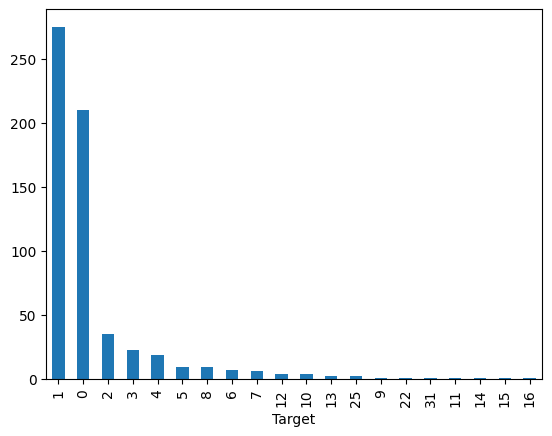

In [236]:
final_df.Target.value_counts().plot(kind="bar");

In [237]:
final_df.to_csv("Final_catboost_.csv", index=False)